# **Install and Import**

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
# !pip install datasets

In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
import random
import os
import io
import csv
import json
#from datasets import load_dataset
import warnings
warnings.filterwarnings("ignore")     

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Convert .csv to json**

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 160)
tdf = pd.read_csv("/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/test.csv")
tdf.head()

,text,sentiment
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]    
    return ' '.join(stems)

In [ ]:
tdf['text'] = tdf['text'].apply(clean_text)
tdf.head()

,text,sentiment
0,im feel rather rotten so im not veri ambiti right now,sadness
1,im updat my blog becaus i feel shitti,sadness
2,i never make her separ from me becaus i don t ever want her to feel like i m asham with her,sadness
3,i left with my bouquet of red and yellow tulip under my arm feel slightli more optimist than when i arriv,joy
4,i wa feel a littl vain when i did thi one,sadness


In [ ]:
tdf.sentiment.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: sentiment, dtype: int64

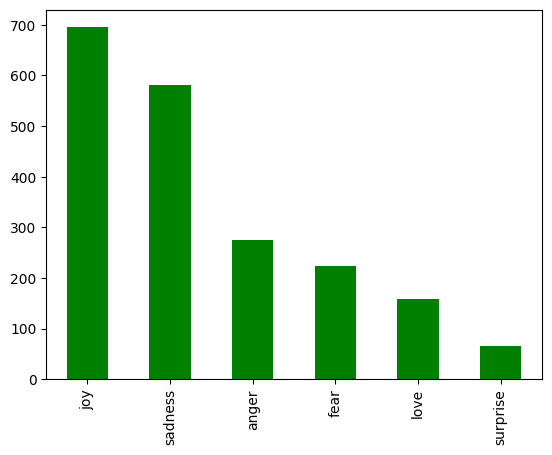

In [ ]:
tdf.sentiment.value_counts().plot(kind='bar', color = 'green');

In [5]:
dataset_data = [
    {
        "instruction": "Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",
        "input": row_dict["text"],
        "output": (row_dict["sentiment"])
    }
    for row_dict in tdf.to_dict(orient="records")
]

In [6]:
with open("/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.json", "w") as f:
   json.dump(dataset_data, f)

### **Load .json**

In [7]:
with open('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.json', 'r') as f:
    data = pd.read_json(f)     

In [8]:
# data = load_dataset("json", data_files="/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.json")

In [10]:
# data["train"]

In [11]:
# data["train"][0]

# **evaluate .json**

# **Convert Json to csv**

In [12]:
import pandas as pd

# Read JSON data
with open('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.json', 'r') as f:
    data = pd.read_json(f)

# Convert JSON data to CSV
data.to_csv('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.csv', index=False)


In [13]:
import pandas as pd

# Read CSV file
csv_path = '/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/vicuna_test.csv'
data = pd.read_csv(csv_path)

data.head()

,instruction,input,output
0,"Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",im feeling rather rotten so im not very ambitious right now,sadness
1,"Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",im updating my blog because i feel shitty,sadness
2,"Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,"Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,"Classify the text as one of the emotions If it's not clear, choose the emotion that is closest to: joy,sadness,anger, fear, love, surprise.",i was feeling a little vain when i did this one,sadness
